In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

In [43]:
# paths to the images and the text file which holds the scores and ids
ava_dataset_path = r'/Users/valentinwolf/data/AVA_dataset/AVA.txt'
base_images_path = r'/Users/valentinwolf/data/AVA_dataset/images/'

hq_thumbs = r'/Users/valentinwolf/data/AVA_dataset/thumbs_hq/'

In [37]:
# # resize pictures to (224,224) 
# import resize
# resize.resize_folder(base_images_path,hq_thumbs,resample='NEAREST',target_size=(224,224))

Resizing 500 images... Done!


In [44]:
from utils.data_loader import import_dataset

train_image_paths, train_scores = import_dataset(hq_thumbs,ava_dataset_path)

x = train_image_paths[-500:]
y = train_scores[-500:]

Loaded 100% of the dataset

In [6]:
import evaluate
from utils.score_utils import mean_score,std_score,earth_mover_distance

#load the net
nas_net = evaluate.nasnet()

Using TensorFlow backend.


In [47]:
score_list = evaluate.evaluate(nas_net,x,batch_size=4)
y_pred = np.asarray(score_list)
loss = earth_mover_distance(y,y_pred)
print("\nEMD: {}".format(loss))

Evaluating: 500/500
EMD: 0.07106675207614899


In [76]:
from utils.score_utils import mean_score,std_score,earth_mover_distance

def evaluate_ava(model,image_paths,y_truth=None):
    """
    image_paths[i] has label y_truth[i]
    """
    y_pred = evaluate.evaluate(model,image_paths)  
    if y_truth is not None:
        loss = earth_mover_distance(y_truth,y_pred)
        print("\nEMD: {}".format(loss))
        return y_pred, loss
        
    return y_pred

In [77]:
y_pred, loss = evaluate_ava(nas_net,x,y)

Evaluating: 500/500
EMD: 0.07106675207614899


In [50]:
results = zip(x,mean_score(y_pred),mean_score(y))
results = sorted(results, key=lambda x: x[1], reverse=True)

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

import glob

def show_imgs(img_paths,titles=None,columns=10,sort_by_title=True,fig_save_path=None):
    """
    to show plot with many pictures use 
    
        jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
       
    results: (file_name,title)

    """
    if titles is None: 
        titles = ["Image {}".format(i) for i,_ in enumerate(img_paths)]
    
    tuples = zip(img_paths,titles)
    
    if sort_by_title:
        tuples = sorted(tuples,key=lambda x: x[1][0],reverse=True)

    fig = plt.figure(figsize=(20, 2*(1+len(tuples)//columns)))
    print()
    for i,(fn,mean_score) in enumerate(tuples):
        sub_plt = fig.add_subplot(1*(1+len(tuples)//columns), 10, i + 1)
        img = mpimg.imread(fn)
        sub_plt.set_title("Mean: {:.2f} | {:.2f}".format(mean_score[0],mean_score[1]))
        sub_plt.imshow(img)
        sub_plt.axis('off')
    if fig_save_path is not None:
        plt.savefig(fig_save_path)
        print("Saved figure")
    
    return

In [62]:
show_imgs(x,zip(mean_score(y_pred),mean_score(y)),fig_save_path="images/ava_ranked.png")


Saved figure


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Pred: 5.217178476974368 | Truth: 6.995934817939997


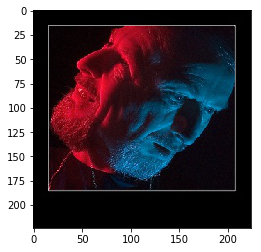

In [55]:
arg = np.abs((mean_score(y_pred) - mean_score(y))).argmax()
img = mpimg.imread(x[arg])
plt.imshow(img)
print("Pred: {} | Truth: {}".format(mean_score(y_pred[arg]),mean_score(y[arg])))

In [67]:
def visualize_results(arg,y_truth,y_pred,image_paths):
    fig = plt.figure(figsize=(6,2))
    ax = plt.subplot(1,2,1)
    x = np.asarray(range(1,11))
    ax.bar(x+0.15,y_truth[arg],align='center',width=0.5,color='g',label="Truth")
    ax.bar(x-0.15,y_pred[arg],align='center',width=0.5,color='r',label='Pred')
    ax.legend()
    ax.set_title("Predicted vs real distribution")
    ax.set_xticks(x)
    ax.set_xlabel("pred: {:.2f} | truth: {:.2f} | err: {:.2f} | emd: {:.2f}".format(
          mean_score(y_pred[arg]),
          mean_score(y_truth[arg]),
          abs(mean_score(y_pred[arg]) - mean_score(y_truth[arg])),
          earth_mover_distance(y_truth[arg],y_pred[arg])))

    pic = plt.subplot(1,2,2)
    img = mpimg.imread(image_paths[arg])
    pic.imshow(img)
    pic.axis('off')
    plt.show()

**Worst Predictions:**

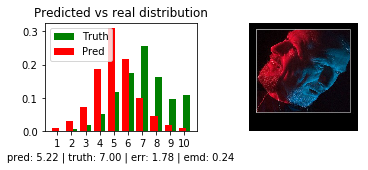

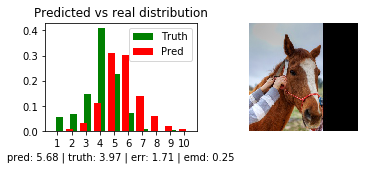

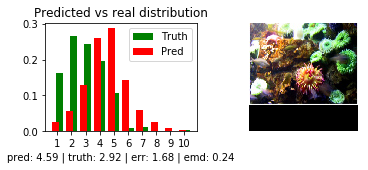

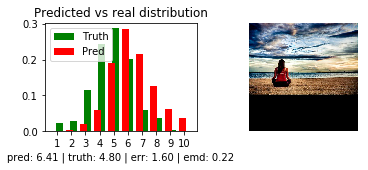

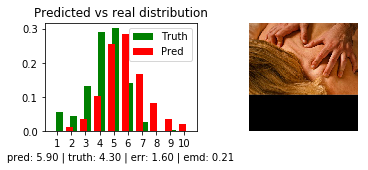

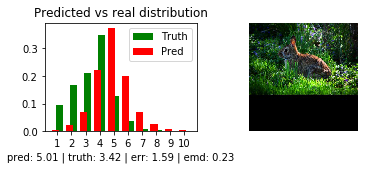

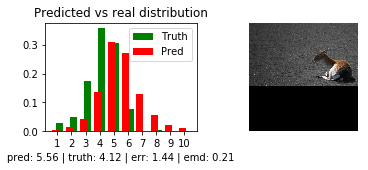

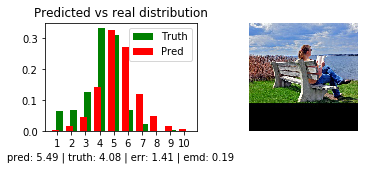

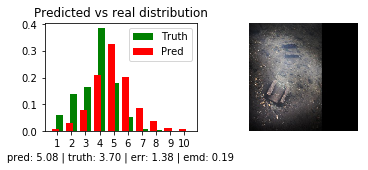

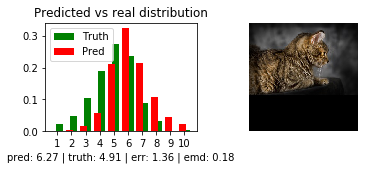

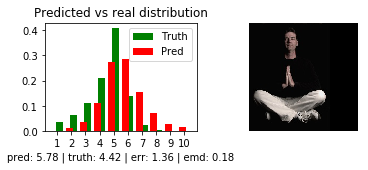

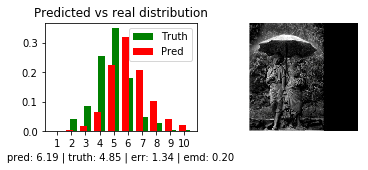

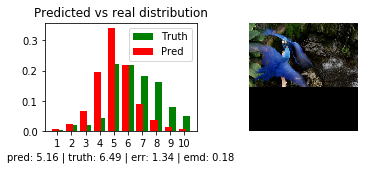

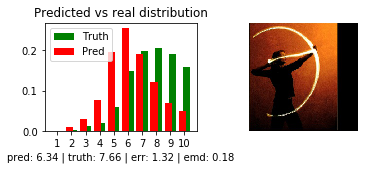

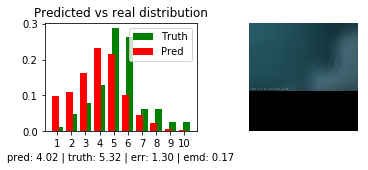

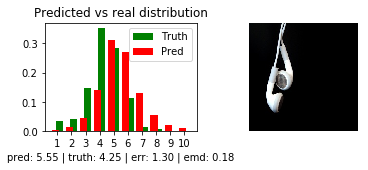

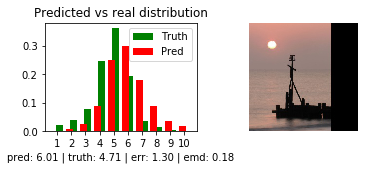

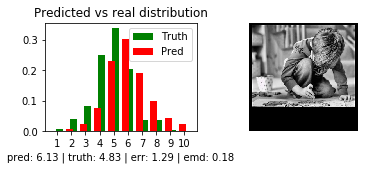

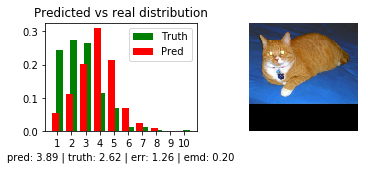

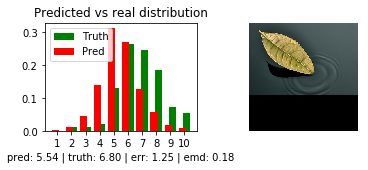

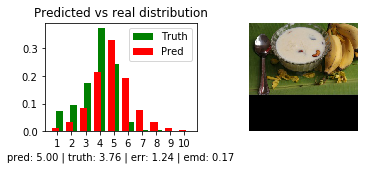

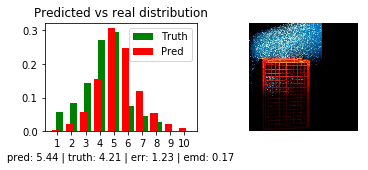

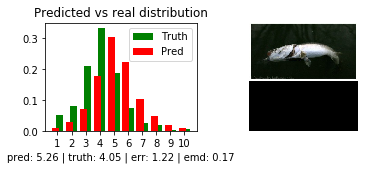

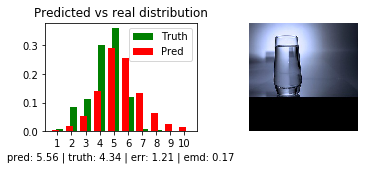

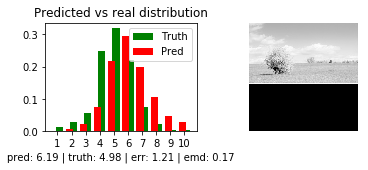

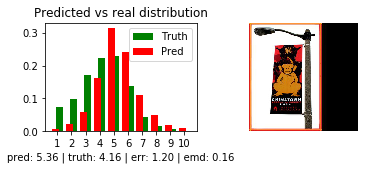

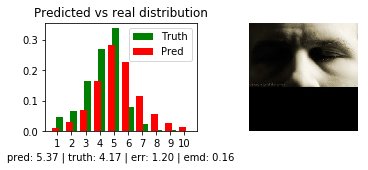

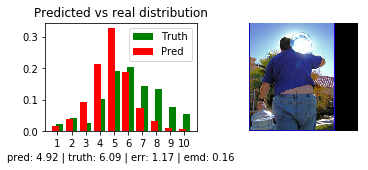

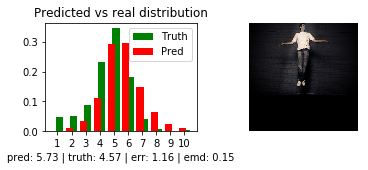

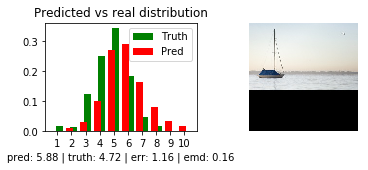

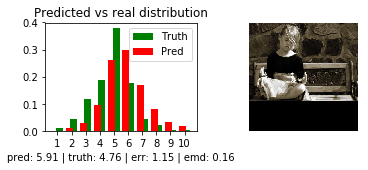

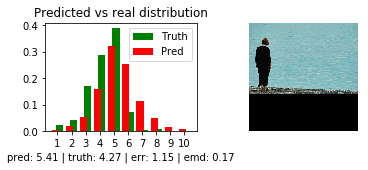

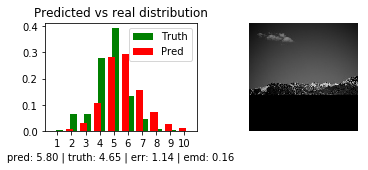

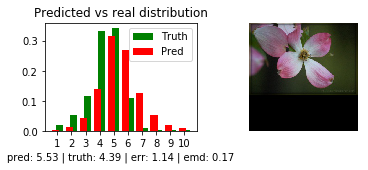

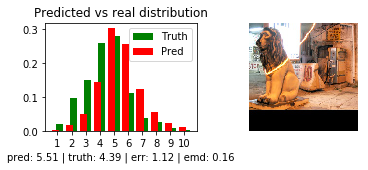

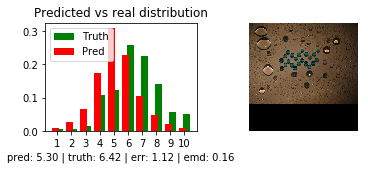

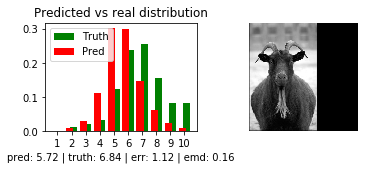

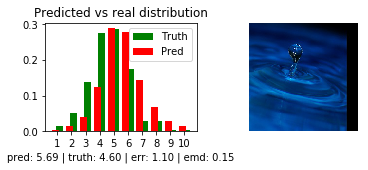

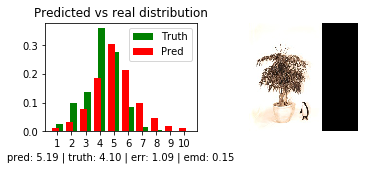

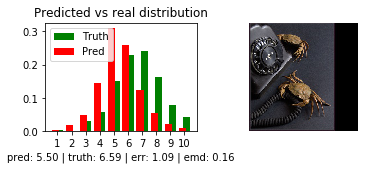

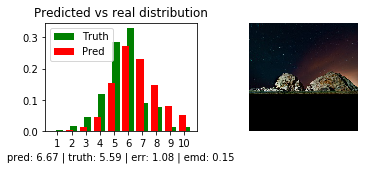

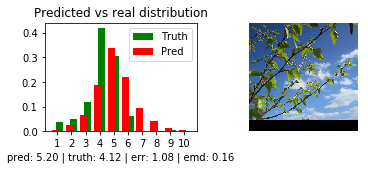

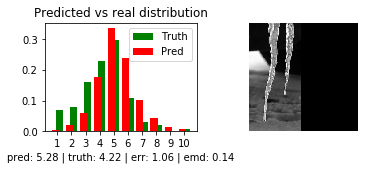

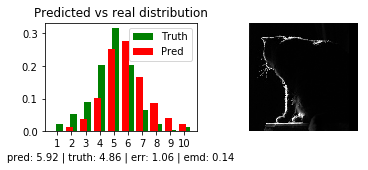

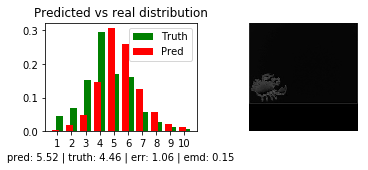

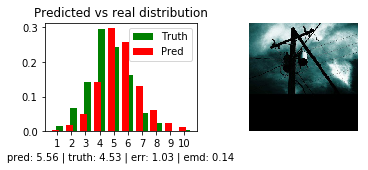

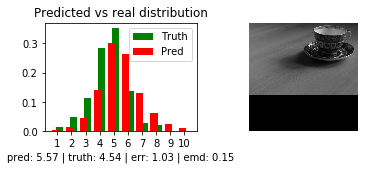

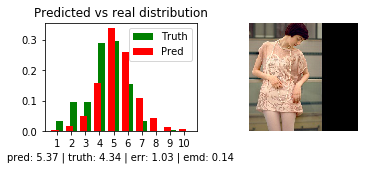

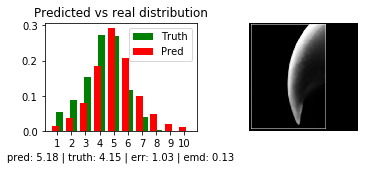

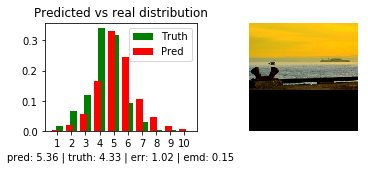

In [68]:
a = np.abs((mean_score(y_pred) - mean_score(y)))
worst = np.argsort(a)[-50:]
for i in worst[::-1]:
    visualize_results(i,y,y_pred,x)

**Best Predictions:**

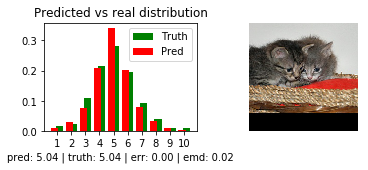

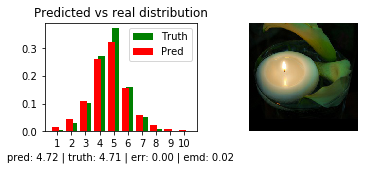

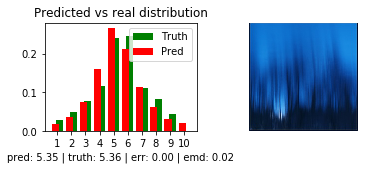

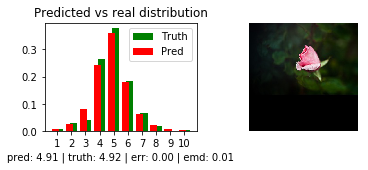

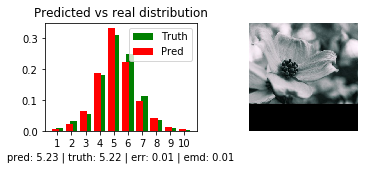

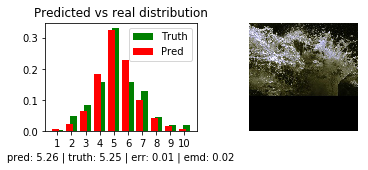

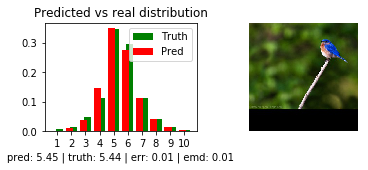

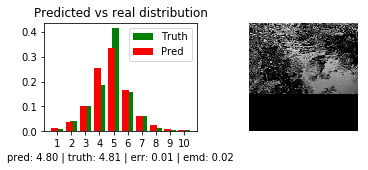

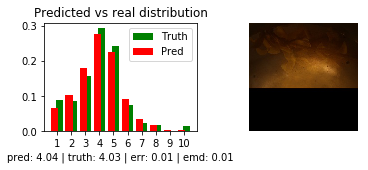

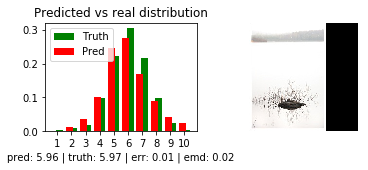

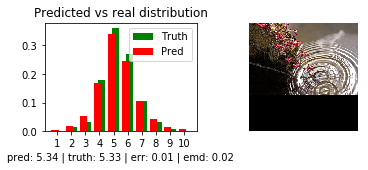

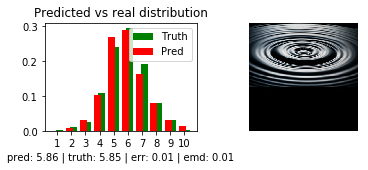

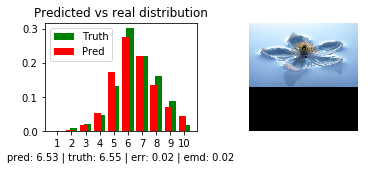

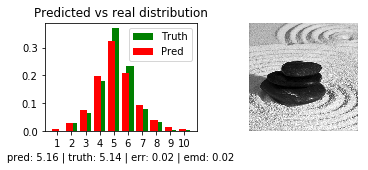

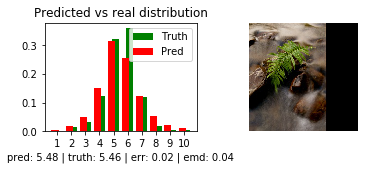

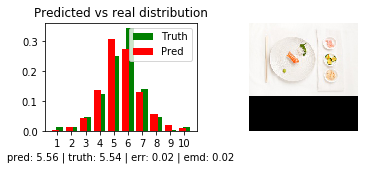

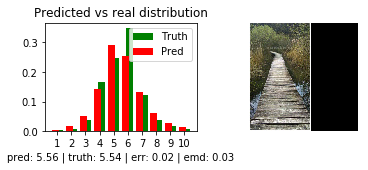

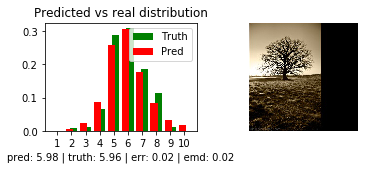

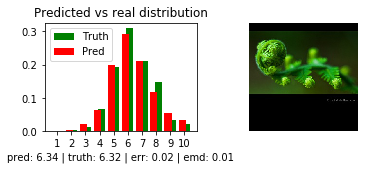

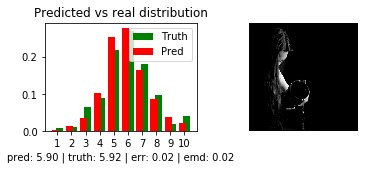

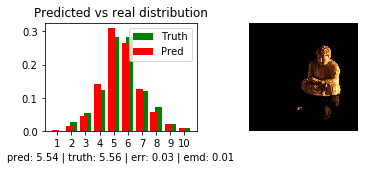

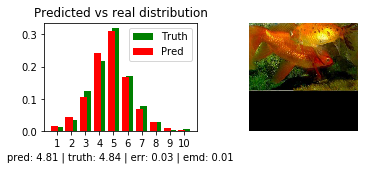

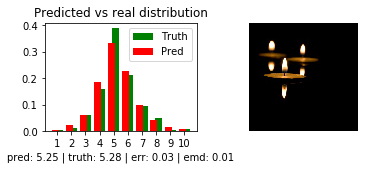

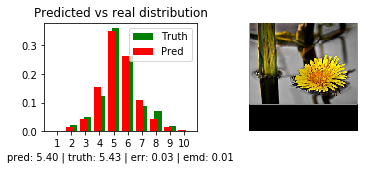

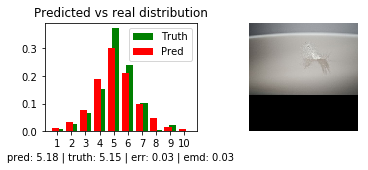

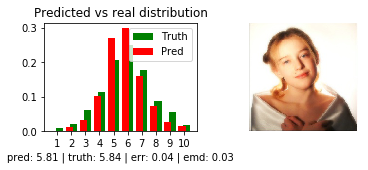

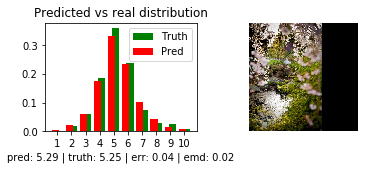

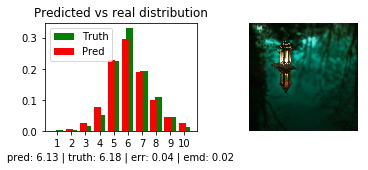

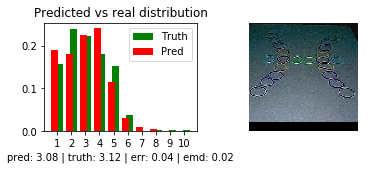

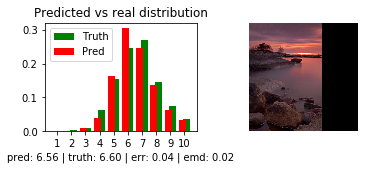

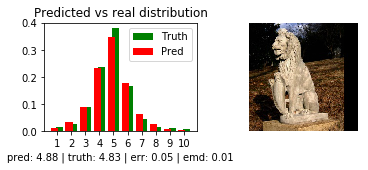

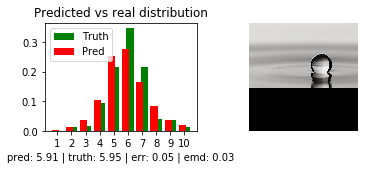

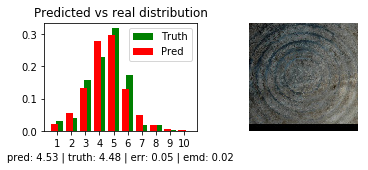

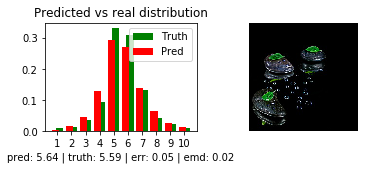

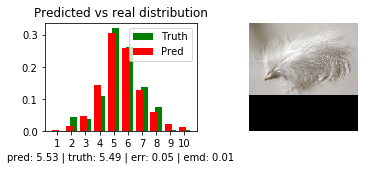

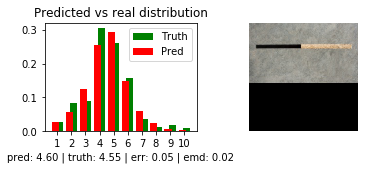

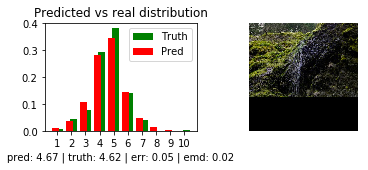

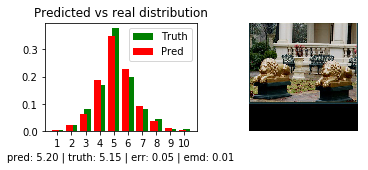

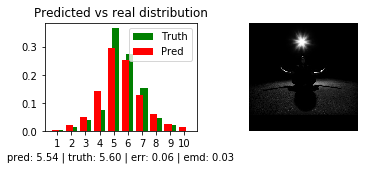

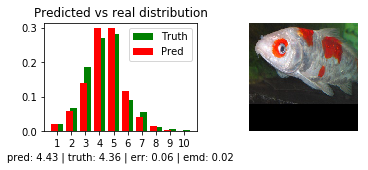

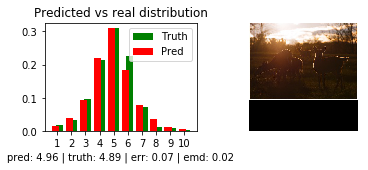

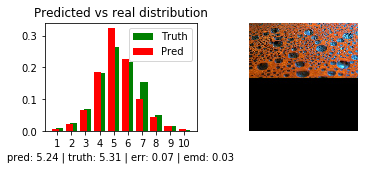

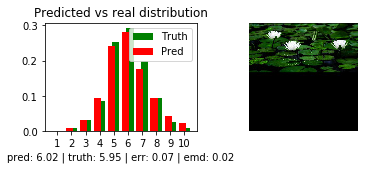

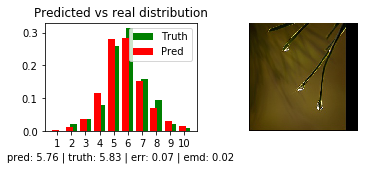

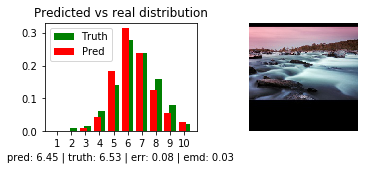

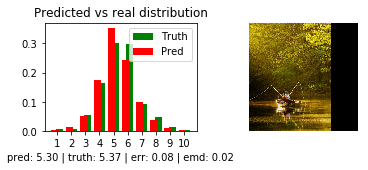

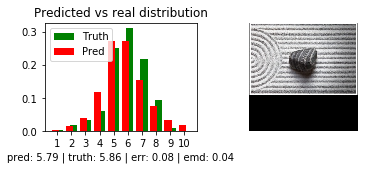

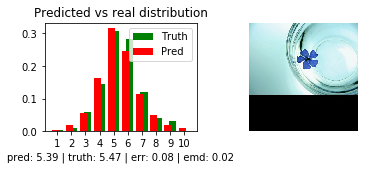

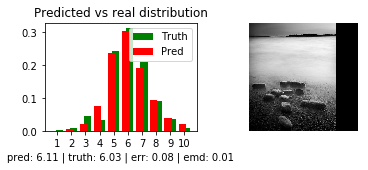

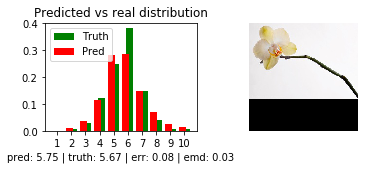

In [69]:
best = np.argsort(a)[:50]
for i in best:
    visualize_results(i,y,y_pred,x)

In [57]:
src = r"/Volumes/Fotos 1/Vali/Exportierte Jpegs/"
dest = r"/Volumes/Fotos 1/Vali/resize/"

# # Only resize once
# import resize
# resize.resize_folder(src,dest,resample='NEAREST')

In [58]:
# def show_imgs(img_paths,titles=None,columns=10,sort_by_title=True,):
#     """
#     to show plot with many pictures use 
#     
#         jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#        
#     results: (file_name,title)
# 
#     """
#     if titles is None: 
#         titles = ["Image {}".format(i) for i,_ in enumerate(img_paths)]
#     
#     tuples = zip(img_paths,titles)
#     if sort_by_title:
#         tuples = sorted(tuples,key=lambda x: x[1],reverse=True)
# 
#     fig = plt.figure(figsize=(20, 2*(1+len(tuples)//columns)))
#     
#     #fig = plt.figure(figsize=(20, 2))
#     print()
#     for i,(fn,mean_score) in enumerate(tuples[:1000]):
#         #if i%columns == 0: 
#         #    fig.show()
#             #plt.close(fig)
#         #    fig = plt.figure(figsize=(20, 2))
#         sub_plt = fig.add_subplot((1+len(tuples)//columns), columns, i+1)#%columns + 1)
#         img = mpimg.imread(fn)
#         sub_plt.set_title("Mean: {:.2f} ".format(mean_score,2))
#         sub_plt.imshow(img)
#         sub_plt.axis('off')
#     return
# 

In [63]:
img_paths = glob.glob("/Users/valentinwolf/data/my_pictures/nearest_thumbs/" + "*.jpg*")
result = evaluate.evaluate(nas_net,img_paths)
score = mean_score(result)

Evaluating: 3714/3714

In [70]:
show_imgs(img_paths,zip(score,score),fig_save_path="images/nearest_ranked")


Saved figure


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [72]:
img_paths_nearest = glob.glob("/Users/valentinwolf/data/my_pictures/lanczos_thumbs/" + "*.jpg*")
result_nearest = evaluate.evaluate(nas_net,img_paths_nearest)
score_nearest = mean_score(result_nearest)

Evaluating: 3714/3714

In [75]:
show_imgs(img_paths_nearest,zip(score_nearest,score_nearest),columns=10,fig_save_path="images/lancos_ranked.png")


Saved figure


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
